<a href="https://colab.research.google.com/github/Juancarlos56/Repositorio-Simulacion-10/blob/main/TareasEnClases/Tarea9_SimPy_InterrupcionesCovid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Practica.

Realizar la planificación y modelado de una simulacion basado en eventos discretos para identificar los contagios dentro de un establecimiento de estudiantes post COVID-19 para el reingreso de clases. Los pasos para el regreso progresivo a clases se describe a continuación:

            ▪ Calcular e Identificar el aforo máximo permitido en la institución educativa.
            ▪ Identificar el número de estudiantes y el porcentaje de contagio dentro del contexto poblacional el mismo que se aplicara dentro de la simulación por el contagio.
            ▪ Generar la simulación desde la puerta de ingreso y la salida del plantel por día.
            ▪ Los estudiantes hacen fila para ingresar al establecimiento y no pueden superar el aforo permitido.
            ▪ Realizar con un tiempo de un 1 mes.
         
Generar graficas que indiquen los estudiantes que presentaron complicaciones y el total de estudiantes por establecimiento en cada día o semana.

**Nota**: No tomar datos de transporte, numero de aulas, personal docente, etc. Solo se el ingreso, salida y el contagio dentro del establecimiento.


In [1]:
!pip install simpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import simpy
import random
import matplotlib.pyplot as plt


#### Las clases deberán ser organizadas de tal manera que no coincidan con otros grupos, ya que no pueden encontrarse en un sólo piso más del 50% del aforo total permitido como se solicita a nivel nacional. 

Referencia UCuenca: https://www.ucuenca.edu.ec/images/NOTICIASINSTITUCION/2021/SEPTIEMBRE/retorno/protocolo/Anexo-9---Ciencias-Medicas.pdf

Referencia tomada de UPS: https://dspace.ups.edu.ec/bitstream/123456789/21772/1/ings_n27_Pe%c3%b1a-C%c3%a1ceres_More-More_Cornejo-Sojo_Garay-Silupu.pdf

## Calcular e Identificar el aforo máximo permitido en la institución educativa.

In [3]:
#Aforo maximo permitido dentro del colegio ciudad de paute 
##Metros cuadrados de la unidad educativa 
metrosCuadrados  = 1800
numeroDeAulas = 32
metrosCuadradoPorAula = int(metrosCuadrados/numeroDeAulas)
AforoMaximoEstudiantesPorAula = 28
distanciaMinima = 2*2
maximoPersonasPorAula = int(metrosCuadradoPorAula / distanciaMinima)
print("Aula abarca un total de: ",AforoMaximoEstudiantesPorAula,", pero el aforo Maximo de personas permitidas es: ", maximoPersonasPorAula, " para tener un distanciamiento de 2*2, la aula mide: ",metrosCuadradoPorAula, " metros cuadrado")
totalPersonas = maximoPersonasPorAula * numeroDeAulas
print("cantidad de personas dentro de la institucion: ", totalPersonas)
print("Aforo utilizado: ", str(maximoPersonasPorAula/AforoMaximoEstudiantesPorAula))

Aula abarca un total de:  28 , pero el aforo Maximo de personas permitidas es:  14  para tener un distanciamiento de 2*2, la aula mide:  56  metros cuadrado
cantidad de personas dentro de la institucion:  448
Aforo utilizado:  0.5


### Identificar el número de estudiantes y el porcentaje de contagio dentro del contexto poblacional el mismo que se aplicara dentro de la simulación por el contagio.

In [4]:
##Un profesor por aula
##-48 haciendo referencia a profesores y personal administrativo
numeroEstudiantes = totalPersonas - 48
print("El numero de estudiantes es: ", numeroEstudiantes)

El numero de estudiantes es:  400


##### Ubicacion Paute - Azuay - Ecuador 
- Calificado como 	Alto riesgo segun: https://www.salud.gob.ec/ecuador-activa-semaforo-de-proteccion-covid-19/, sin embargo las clases se las impartieron virtul y presencial

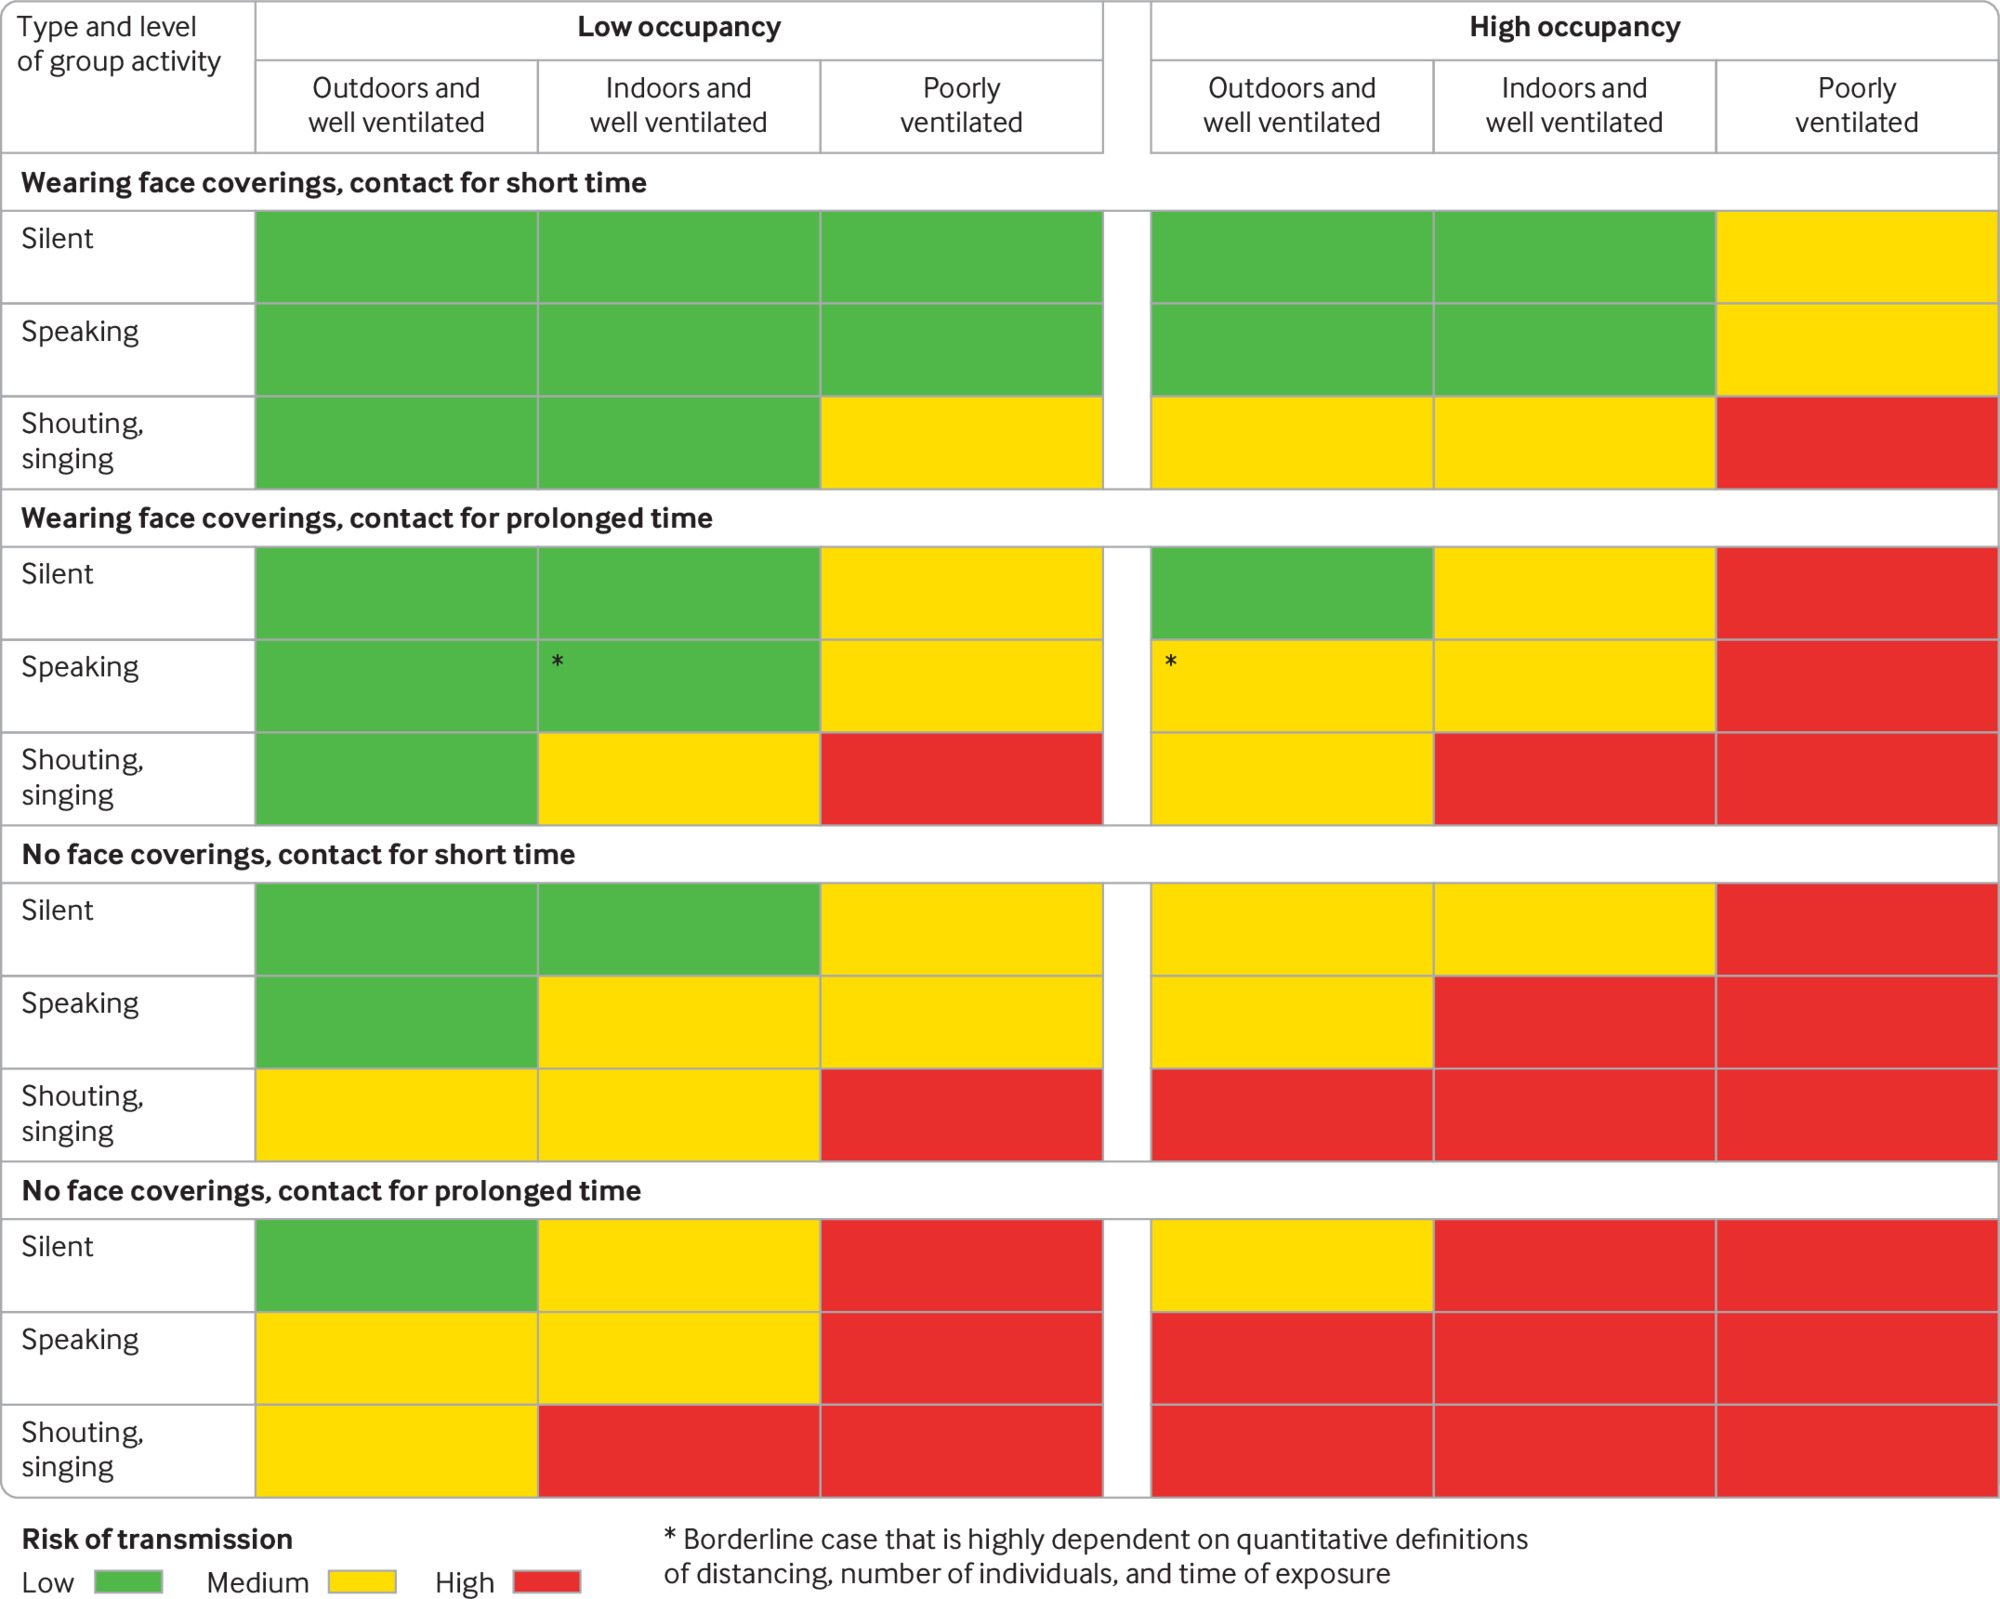




imagen tomada de: https://www.bmj.com/content/370/bmj.m3223

***NOTA:***

He decidido trabajar con speaking y mala ventilacion en un rango bajo bajo de personas dentro del establecimiento. Todos los asistentes llevan cubrebocas

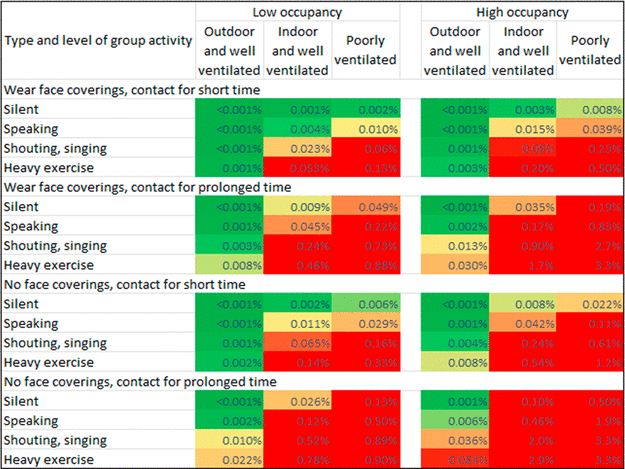

Referencia: https://pubs.acs.org/doi/10.1021/acs.est.2c00792

***Nota:** 

Vamos a trabajar con el valor de 0.22%

In [5]:
## Definiendo porcentaje de contagio
porcentajeContagio = 0.22

### Generar la simulación desde la puerta de ingreso y la salida del plantel por día.

- Los estudiantes hacen fila para ingresar al establecimiento y no pueden superar el aforo permitido.
- Realizar con un tiempo de un 1 mes.

**Para el tiempo de simulacion:**

- Se toma en cuenta solo 6 horas dentro del establecimiento desde 7h30 hasta 13h30

In [304]:
Tiempo_ES_Estudiante = 60 # TIEMPO PROMEDIO DE ingreso/salida por estudiante, minutos 
Numero_Estudiantes_Institucion = numeroEstudiantes
Porcentaje_Contagio = porcentajeContagio
Tiempo_Simmulacion = 360*1 ##360 minutos son 6 horas de clases esto lo evaluamos por 30 dias
Tiempo_Recuperacion_covid = 12 ##12 dias de recuperacion 

In [7]:
from numpy import random as nprandom
def generarContagios():
  return nprandom.binomial(n=1, p=Porcentaje_Contagio, size=1)  

In [8]:
t = ''
cont_1 = 0
for i in range(0,400):
  x = generarContagios() 
  if(x == 1): 
    cont_1 += 1
print("De 400 personas, segun el valor de contagio tendira: ", cont_1, " con covid-19")

De 400 personas, segun el valor de contagio tendira:  89  con covid-19


In [9]:
from numpy import random as nprandom
#Distribucion normal
def entrada_al_plantel():
  ##Tiempo total en I/S = 60, para ingreso se trabaja con 30 minutos
  ##Existen 10 buses con 40 alumnos cada uno 
  ##Obtenemos el tiempo de ingreso para los 40 alumnos
  ##Rodea aproximadamente entre 3 minutos
    return abs(random.normalvariate((int(Tiempo_ES_Estudiante/2)/10), 1))
#Distribucion normal
def salida_del_plantel():
    return abs(random.normalvariate((int(Tiempo_ES_Estudiante/2)/10), 1))

#Distribucion Binomial
def contagioAlumno():
    return nprandom.binomial(n=1, p=Porcentaje_Contagio, size=1) 

def tiempo_en_establecimiento():
   return random.normalvariate(360, 0)


In [116]:
#La Escuela tiene tres eventos salida, entrada y clases
import math

class Escuela():
    def __init__(self, env):
        self.env = env
        self.establecimiento = simpy.Resource(env, 1)
        #self.numero_aulas = simpy.Resource(env, numero_aulas)
        self.numero_estudiantes = 0
        self.contagio = False
        self.numero_contagios = 0
        self.entrada = False
        self.salida = False
        
    def llegada_establecimiento(self):
        demora_ingreso = entrada_al_plantel() # Cuanto se demora estudiante en llegar 
        yield self.env.timeout(demora_ingreso)
        self.numero_estudiantes += 40
    
    def salida_establecimiento(self):
        demora_salida = salida_del_plantel() # Cuanto se demora estudiante en salir 
        yield self.env.timeout(demora_salida)
        self.numero_estudiantes -= 40
    
    def estancia_dentro_de_establecimiento(self):
        estancia_establecimiento = int(tiempo_en_establecimiento()) 
        yield self.env.timeout(estancia_establecimiento)

In [205]:
def contagio_dentro_de_establecimiento(env):
    ##Obtencion por dia de clases
    for key in lista_alumnos_covid:
      valorContagio = contagioAlumno() 
      if valorContagio == 1:
        lista_alumnos_covid[key] = [1, math.trunc(round(env.now)/1440)]
      else:
        lista_alumnos_covid[key] = [0]
        
def ingresoEstablecimiento(env, escuela):
  with escuela.establecimiento.request() as institucion:
      yield institucion
      yield env.process(escuela.llegada_establecimiento())

def estanciaDentroEstablecimiento(env, escuela):
  with escuela.establecimiento.request() as institucion:
      yield institucion
      print("Inicio de clases a las %.2f."%(env.now))
      yield env.process(escuela.estancia_dentro_de_establecimiento())
      print("Fin de clases a las %.2f."%(env.now))      
      contagio_dentro_de_establecimiento(env)
def salidaEstablecimiento(env, escuela):
  with escuela.establecimiento.request() as institucion:
      yield institucion
      yield env.process(escuela.salida_establecimiento())

In [328]:
def ejecutar_simulacion(env):
    establecimiento=Escuela(env)
    #yield env.timeout(60*7)
    cont = 0
    while True: 
      diaActual = math.trunc(round(env.now)/1440)

      ##Verificacion de contagiados no deberian entrar dentro de la institucion
      for key in lista_alumnos_covid.copy(): 
        ##Alumno con covid
        if(lista_alumnos_covid[key][0] == 1):
            ##Debera permenecer en cuarentena entre 10-14
            lista_alumnos_covid_con_covid[key] = lista_alumnos_covid[key]
            del lista_alumnos_covid[key]
      cantidadAlumnosDias['Dia'+str(diaActual)] = [len(lista_alumnos_covid), len(lista_alumnos_covid_con_covid)]
      # Ingreso a la escuela
      print("Comienza ingreso de alumnos a las %.2f."%(env.now))

      while (establecimiento.numero_estudiantes < Numero_Estudiantes_Institucion):
        yield env.timeout(1)
        #Aproximadamente cada 3 minutos llegan 40 alumanos al establecimeinto
        yield env.process(ingresoEstablecimiento(env,establecimiento))

      ##Estudiantes han ingresado al establecimiento
      print("Fin de ingreso de alumnos a las %.2f."%(env.now), "cantidad de alumanos: ", establecimiento.numero_estudiantes)
      
      ##Porcentaje de infeccion dentro del establecimiento
      print("Comienza el horario de clases a las %.2f."%(env.now))
      ##Rango de infeccion cada hora
      yield env.process(estanciaDentroEstablecimiento(env,establecimiento))
      print("Termina horario de clases a las  %.2f."%(env.now))   

      ##Salida de alumnos de la institucion 

      print("Comienza salida de alumnos a las %.2f."%(env.now))
      while (establecimiento.numero_estudiantes > 0):
        yield env.timeout(1)
        # Cada minito salen 40 alumanos al establecimeinto
        yield env.process(salidaEstablecimiento(env,establecimiento))
      ##Estudiantes han ingresado al establecimiento
      print("Fin de salida de alumnos a las %.2f."%(env.now))    

      if cont == 0: 
        print("Horas libres de los estudiantes: ", (int((1440 - env.now)/60)))
        yield env.timeout((1440 - env.now))
      else: 
        print("Horas libres de los estudiantes: ", (int(((1440*(cont + 1)) - env.now)/60)))
        yield env.timeout(((1440*(cont + 1)) - env.now))
      
      
      ##Si ya se cumplio el aislamiento deberia volver a clases
      for key in lista_alumnos_covid_con_covid.copy(): 
        ##Alumno con covid
        if((lista_alumnos_covid_con_covid[key][1]+Tiempo_Recuperacion_covid) == diaActual):
            #print("cumplio con aislamiento: ", lista_alumnos_covid_con_covid[key], "*************")
            ##Debera permenecer en cuarentena entre 10-14
            lista_alumnos_covid[key] = [0]
            del lista_alumnos_covid_con_covid[key]

      cont += 1

In [329]:
lista_alumnos_covid = {}
for x in range(0,Numero_Estudiantes_Institucion):
  lista_alumnos_covid[('Alumno_'+str(x))] = [0]
print(len(lista_alumnos_covid))

400


In [330]:
lista_alumnos_covid_con_covid = {}
lista_alumnos_covid_con_recuperados = {}

In [331]:
cantidadAlumnosDias = {}

In [332]:
print('COVID - Juan Barrera')
# Inicializamos la semilla aleatoria
random.seed(77)
nprandom.seed(1)

# Creamos el entorno de simulacion
env=simpy.Environment()
env.process(ejecutar_simulacion(env))

# Ejecutamos el proceso durante el tiempo de simulacion
env.run(until = 1440*30)

#tiempoCon3Maquinas = tiempo

COVID - Juan Barrera
Comienza ingreso de alumnos a las 0.00.
Fin de ingreso de alumnos a las 34.38. cantidad de alumanos:  400
Comienza el horario de clases a las 34.38.
Inicio de clases a las 34.38.
Fin de clases a las 394.38.
Termina horario de clases a las  394.38.
Comienza salida de alumnos a las 394.38.
Fin de salida de alumnos a las 431.66.
Horas libres de los estudiantes:  16
Comienza ingreso de alumnos a las 1440.00.
Fin de ingreso de alumnos a las 1478.57. cantidad de alumanos:  400
Comienza el horario de clases a las 1478.57.
Inicio de clases a las 1478.57.
Fin de clases a las 1838.57.
Termina horario de clases a las  1838.57.
Comienza salida de alumnos a las 1838.57.
Fin de salida de alumnos a las 1880.54.
Horas libres de los estudiantes:  16
Comienza ingreso de alumnos a las 2880.00.
Fin de ingreso de alumnos a las 2926.88. cantidad de alumanos:  400
Comienza el horario de clases a las 2926.88.
Inicio de clases a las 2926.88.
Fin de clases a las 3286.88.
Termina horario de 

In [333]:
print(len(lista_alumnos_covid))

102


In [334]:
print(len(lista_alumnos_covid_con_covid))

298


In [335]:
print(cantidadAlumnosDias)

{'Dia0': [400, 0], 'Dia1': [306, 94], 'Dia2': [244, 156], 'Dia3': [194, 206], 'Dia4': [150, 250], 'Dia5': [115, 285], 'Dia6': [88, 312], 'Dia7': [64, 336], 'Dia8': [47, 353], 'Dia9': [35, 365], 'Dia10': [27, 373], 'Dia11': [20, 380], 'Dia12': [16, 384], 'Dia13': [102, 298], 'Dia14': [133, 267], 'Dia15': [153, 247], 'Dia16': [168, 232], 'Dia17': [180, 220], 'Dia18': [171, 229], 'Dia19': [165, 235], 'Dia20': [142, 258], 'Dia21': [123, 277], 'Dia22': [105, 295], 'Dia23': [86, 314], 'Dia24': [75, 325], 'Dia25': [65, 335], 'Dia26': [81, 319], 'Dia27': [95, 305], 'Dia28': [102, 298], 'Dia29': [102, 298]}


### Generar graficas que indiquen los estudiantes que presentaron complicaciones y el total de estudiantes por establecimiento en cada día o semana.

In [336]:
cantidadAlumnosDias.values()

dict_values([[400, 0], [306, 94], [244, 156], [194, 206], [150, 250], [115, 285], [88, 312], [64, 336], [47, 353], [35, 365], [27, 373], [20, 380], [16, 384], [102, 298], [133, 267], [153, 247], [168, 232], [180, 220], [171, 229], [165, 235], [142, 258], [123, 277], [105, 295], [86, 314], [75, 325], [65, 335], [81, 319], [95, 305], [102, 298], [102, 298]])

In [337]:
estudiantesSinCovid = []
estudiantesConCovid = []

for valor in cantidadAlumnosDias.values():
  estudiantesSinCovid.append(valor[0])
  estudiantesConCovid.append(valor[1])
print(estudiantesSinCovid)
print(estudiantesConCovid)

[400, 306, 244, 194, 150, 115, 88, 64, 47, 35, 27, 20, 16, 102, 133, 153, 168, 180, 171, 165, 142, 123, 105, 86, 75, 65, 81, 95, 102, 102]
[0, 94, 156, 206, 250, 285, 312, 336, 353, 365, 373, 380, 384, 298, 267, 247, 232, 220, 229, 235, 258, 277, 295, 314, 325, 335, 319, 305, 298, 298]


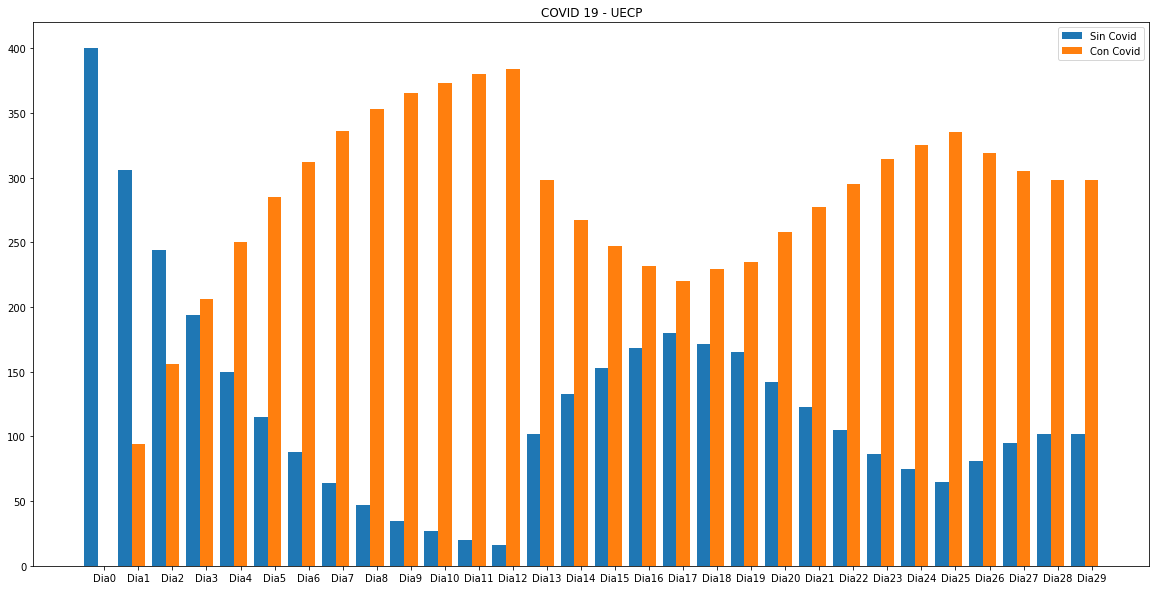

In [338]:
plt.figure(figsize=(20,10), )
import numpy as np
ancho_barras =0.40
indice_barras = np.arange((len(list(cantidadAlumnosDias.keys()))))

titulo="COVID 19 - UECP"
plt.title(titulo)

plt.bar(indice_barras, estudiantesSinCovid, width=ancho_barras, align='center', label='Sin Covid')
plt.bar(indice_barras+ ancho_barras, estudiantesConCovid, width=ancho_barras, align='center', label= 'Con Covid')
plt.xticks(indice_barras + ancho_barras, (list(cantidadAlumnosDias.keys())))
plt.legend(loc='best')
plt.show()